In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import *

from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

In [9]:
model = Sequential()

from keras.layers import *
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, padding = 'same', activation = 'tanh', input_shape = (28, 28, 1)))
model.add(AveragePooling2D(pool_size = 2))
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 120, activation = 'tanh'))
model.add(Dense(units = 84, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

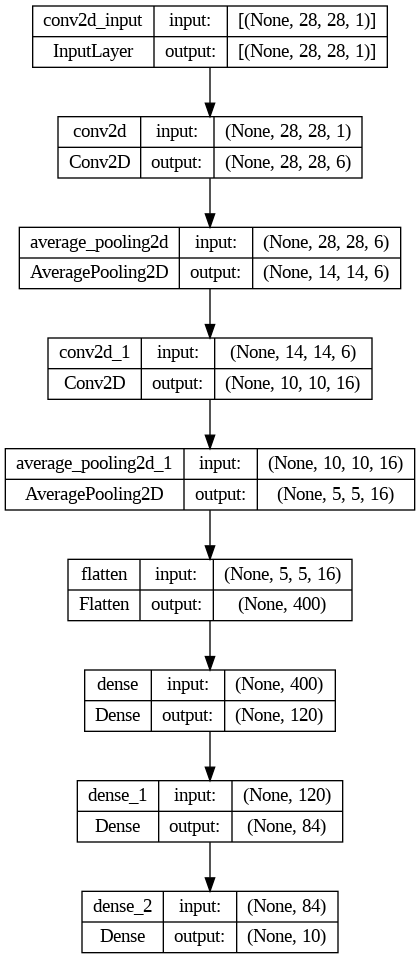

In [11]:
keras.utils.plot_model(model, show_shapes = True)

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'accuracy', mode = 'max', verbose = 1, patience = 5)

history = model.fit(X_train, Y_train, epochs = 10, validation_split = 0.2, callbacks = [es])

Epoch 1/10
1500/1500 [==============================] - 38s 24ms/step - loss: 0.1726 - accuracy: 0.9473 - val_loss: 0.0781 - val_accuracy: 0.9773
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0665 - val_accuracy: 0.9788
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0653 - val_accuracy: 0.9807
Epoch 4/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0505 - val_accuracy: 0.9852
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 7/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0530 -

<Axes: >

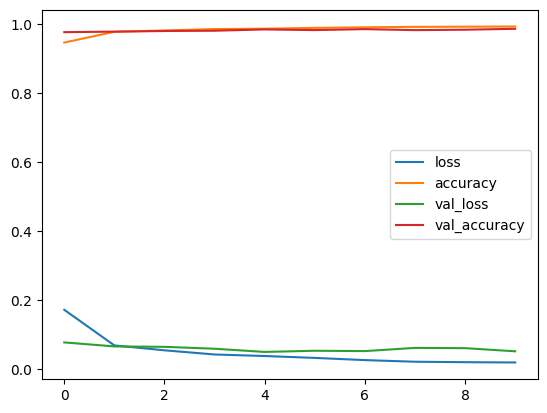

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [16]:
loss, entropy = model.evaluate(X_test, Y_test)
print(loss)
print(entropy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0378 - accuracy: 0.9890
0.037788670510053635
0.9890000224113464


In [18]:
Y_proba = model.predict(X_test[:10]).round(2)

print(Y_proba)

1/1 [==============================] - 0s 33ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [22]:
import numpy as np
Y_pred = np.argmax(Y_proba, axis = 1)
print(Y_pred)

[7 2 1 0 4 1 4 9 5 9]
